# Network Centrality

## Libraries

In [2]:
from numpy  import *
import numpy as np
np.random.seed(100)

In [3]:
import matplotlib.pyplot as plt

In [5]:
import networkx as nx

## Networks Importing

_Lendo redes no formato __edgeslist___

In [10]:
G= nx.read_edgelist("../nets/lesmis.txt", nodetype=int, data=(('weight',float),))
# Ler rede sem pesos
#G= G=nx.read_edgelist("data/zachary.txt", nodetype=int) 
# G=nx.karate_club_graph()

Tranformando para não direcionado

In [12]:
# Não é necessário
G = G.to_undirected()

Extraindo maior componente

In [15]:
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
G=Gcc[0]
Gcc.clear()

Convertendo labeling de nós, iniciando de zero

In [17]:
G = nx.convert_node_labels_to_integers(G, first_label=0)

### Informações da rede

In [19]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 77
Number of edges: 254


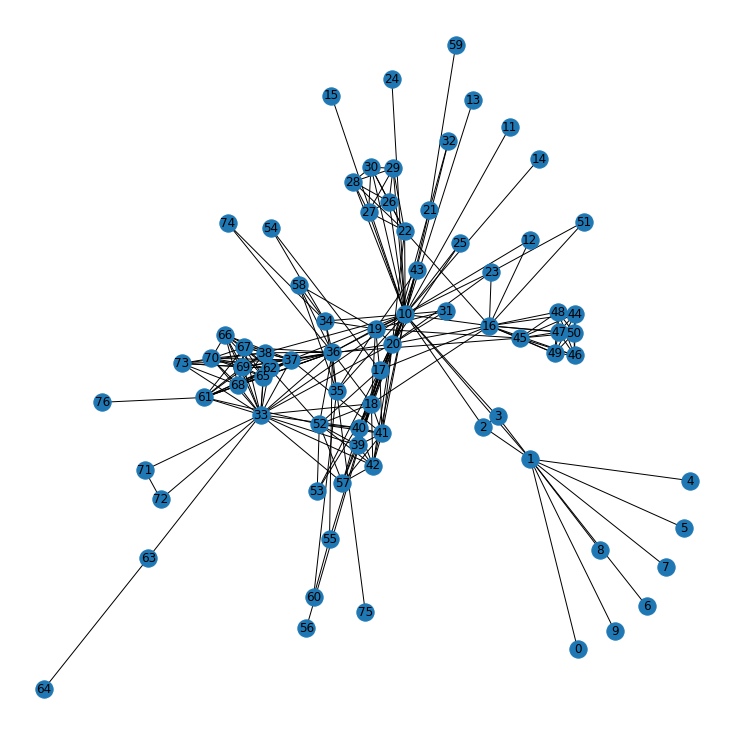

In [21]:
# Desenhando rede
plt.figure(figsize=(10,10))
pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, pos = pos)
plt.show(True)

## Centrality Measures

Análise de medidas de centralidade da rede.

### Degree Centrality

In [25]:
vk = dict(G.degree())
vk = list(vk.values())
print('Degree centrality', vk)

Degree centrality [1, 10, 3, 3, 1, 1, 1, 1, 1, 1, 36, 1, 2, 1, 1, 1, 15, 11, 16, 11, 17, 4, 8, 4, 1, 2, 6, 6, 6, 6, 6, 3, 2, 22, 7, 7, 19, 15, 13, 10, 10, 10, 9, 3, 7, 9, 7, 7, 7, 7, 7, 2, 11, 3, 2, 3, 1, 7, 4, 1, 2, 11, 13, 2, 1, 11, 9, 11, 12, 12, 10, 2, 2, 7, 2, 1, 1]


#### Distribution of Degree Centrality

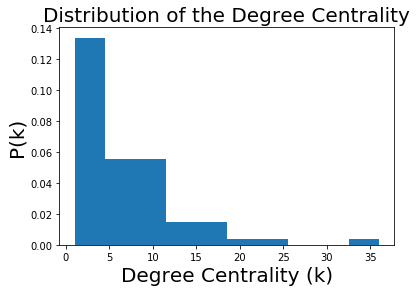

In [26]:
plt.figure(figsize=(6,4))
plt.hist(vk, density=True)
plt.title("Distribution of the Degree Centrality", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.xlabel("Degree Centrality (k)", fontsize=20)
#plt.grid(True)
plt.savefig('degree-centrality.eps')
plt.show(True)

### Closeness Centrality

_Distância média de todos os nós para um outro_

In [28]:
CLC = dict(nx.closeness_centrality(G))
print('Closeness centrality', CLC)

Closeness centrality {0: 0.30158730158730157, 1: 0.4293785310734463, 2: 0.41304347826086957, 3: 0.41304347826086957, 4: 0.30158730158730157, 5: 0.30158730158730157, 6: 0.30158730158730157, 7: 0.30158730158730157, 8: 0.30158730158730157, 9: 0.30158730158730157, 10: 0.6440677966101694, 11: 0.39378238341968913, 12: 0.41304347826086957, 13: 0.39378238341968913, 14: 0.39378238341968913, 15: 0.39378238341968913, 16: 0.46060606060606063, 17: 0.46060606060606063, 18: 0.5170068027210885, 19: 0.4779874213836478, 20: 0.5170068027210885, 21: 0.4021164021164021, 22: 0.42696629213483145, 23: 0.4175824175824176, 24: 0.39378238341968913, 25: 0.3958333333333333, 26: 0.40425531914893614, 27: 0.40425531914893614, 28: 0.40425531914893614, 29: 0.40425531914893614, 30: 0.40425531914893614, 31: 0.4021164021164021, 32: 0.39790575916230364, 33: 0.5135135135135135, 34: 0.4418604651162791, 35: 0.4418604651162791, 36: 0.5314685314685315, 37: 0.4810126582278481, 38: 0.475, 39: 0.4634146341463415, 40: 0.46341463414

#### Average Closeness Cenrality

In [29]:
CLC = list(CLC.values())
av_clc = np.mean(CLC)
print('Average closeness centrality', av_clc)

Average closeness centrality 0.3893412505666164


#### Distribution

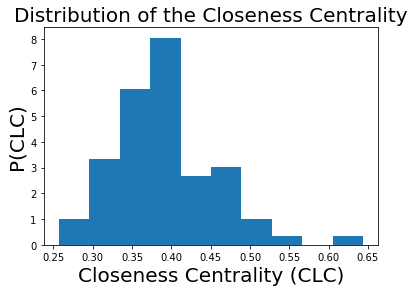

In [30]:
plt.figure(figsize=(6,4))
plt.hist(CLC, density=True)
plt.title("Distribution of the Closeness Centrality", fontsize=20)
plt.ylabel("P(CLC)", fontsize=20)
plt.xlabel("Closeness Centrality (CLC)", fontsize=20)
plt.savefig('closeness.eps')
plt.show(True)

### Betweeness Centrality

In [31]:
# Betweenness centrality
B = dict(nx.betweenness_centrality(G))
print('Betweeness centrality:', B)

Betweeness centrality: {0: 0.0, 1: 0.17684210526315788, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.5699890527836186, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.12964454098819425, 17: 0.02900241873046176, 18: 0.07490122123424227, 19: 0.023796253454148184, 20: 0.05433155966478437, 21: 0.026491228070175437, 22: 0.008040935672514618, 23: 0.008640295033483887, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.1651125024258477, 34: 0.020210621583197756, 35: 0.047598927875243655, 36: 0.132032488621946, 37: 0.0425533568221771, 38: 0.030753650179957816, 39: 0.004960383978389518, 40: 0.004960383978389518, 41: 0.0048618041955992095, 42: 0.0038738298738298736, 43: 0.0, 44: 0.0, 45: 0.04062934817733579, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.011487550654163002, 53: 0.0, 54: 0.00021720969089390142, 55: 0.006925438596491229, 56: 0.0, 57: 0.00043859649122807013, 58: 0.0, 59: 0.0, 60: 0.0003508771929824561, 61:

#### Avarage

In [32]:
B = list(B.values())
av_B = np.mean(B)
print('Average betweenness centrality', av_B)

Average betweenness centrality 0.021881977671451357


#### Distribution

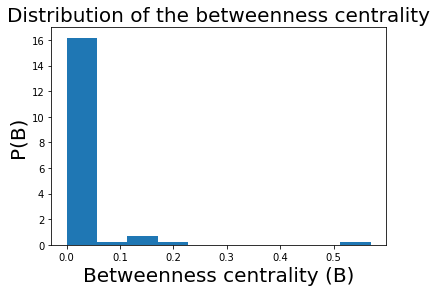

In [34]:
plt.figure(figsize=(6,4))
plt.hist(B, density=True)
plt.title("Distribution of the betweenness centrality", fontsize=20)
plt.ylabel("P(B)", fontsize=20)
plt.xlabel("Betweenness centrality (B)", fontsize=20)
plt.savefig('betweenness.eps')
plt.show(True)

### Eigenvector Centrality

In [35]:
EC = dict(nx.eigenvector_centrality(G, max_iter = 1000))
print('Eigenvetor centrality:', EC)

Eigenvetor centrality: {0: 0.0023434559950116173, 1: 0.028134336026755365, 2: 0.026872999836996418, 3: 0.026872999836996418, 4: 0.0023434559950116173, 5: 0.0023434559950116173, 6: 0.0023434559950116173, 7: 0.0023434559950116173, 8: 0.0023434559950116173, 9: 0.0023434559950116173, 10: 0.26761817598853926, 11: 0.022291152877501864, 12: 0.029767714740768846, 13: 0.022291152877501864, 14: 0.022291152877501864, 15: 0.022291152877501864, 16: 0.08975922949834113, 17: 0.12228242172143362, 18: 0.1878077051550094, 19: 0.11103702398134034, 20: 0.184225163210257, 21: 0.04004860673568995, 22: 0.06227506194694945, 23: 0.046055011005835665, 24: 0.022291152877501864, 25: 0.03763613953656061, 26: 0.04120828302958653, 27: 0.04120828302958653, 28: 0.04120828302958653, 29: 0.04120828302958653, 30: 0.04120828302958653, 31: 0.046884942434314236, 32: 0.025627007259539696, 33: 0.31783893977497674, 34: 0.06539729702430212, 35: 0.063169051443388, 36: 0.2591111453417876, 37: 0.26717863282356663, 38: 0.2421307863

#### Average

In [37]:
EC = list(EC.values())
av_EC = np.mean(EC)
print('Average eigenvector centrality', av_EC)

Average eigenvector centrality 0.07802991544392937


#### Distribution

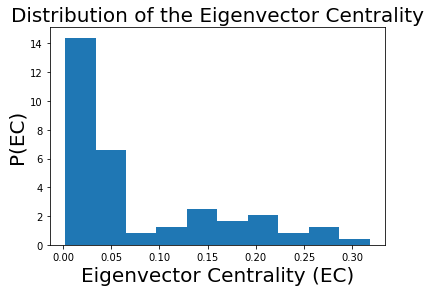

In [39]:
plt.figure(figsize=(6,4))
plt.hist(EC, density=True)
plt.title("Distribution of the Eigenvector Centrality",fontsize=20)
plt.ylabel("P(EC)", fontsize=20)
plt.xlabel("Eigenvector Centrality (EC)", fontsize=20)
plt.savefig('eigenvector.eps')
plt.show(True)

### Page Rank

In [40]:
# Page-rank
PR = dict(nx.pagerank(G, alpha=0.85))
print("PageRank: ", PR)

PageRank:  {0: 0.00302445011662527, 1: 0.039250993615993414, 2: 0.0174136025196972, 3: 0.019544335740158427, 4: 0.00302445011662527, 5: 0.00302445011662527, 6: 0.00302445011662527, 7: 0.00302445011662527, 8: 0.004100848285198591, 9: 0.00302445011662527, 10: 0.09957628217876388, 11: 0.0024837793209218223, 12: 0.0034663800480973523, 13: 0.0024837793209218223, 14: 0.0024837793209218223, 15: 0.0024837793209218223, 16: 0.027165616008694406, 17: 0.020041918882033355, 18: 0.035686585550664805, 19: 0.03691400220269324, 20: 0.026825583087312484, 21: 0.012756526634894348, 22: 0.008917199529451567, 23: 0.007282262834973908, 24: 0.0024837793209218223, 25: 0.003504665775316982, 26: 0.011334725694476959, 27: 0.011334725694476959, 28: 0.009352607660054543, 29: 0.009352607660054543, 30: 0.009352607660054543, 31: 0.004501835654266802, 32: 0.0048074003643200965, 33: 0.028293297311216527, 34: 0.018305855510579578, 35: 0.01668100687325111, 36: 0.051665652353078406, 37: 0.03660191912332661, 38: 0.026182292

#### Page Rank and Betweeness Centrality Correlation

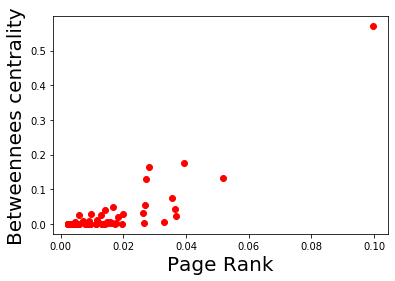

In [41]:
PR = dict(nx.pagerank(G, alpha=0.85))
PR = list(PR.values())
PR = np.array(PR)

B = dict(nx.betweenness_centrality(G))
B = list(B.values())
B = np.array(B)
plt.figure(figsize=(6,4))
plt.ylabel("Betweennees centrality", fontsize = 20)
plt.xlabel("Page Rank", fontsize = 20)
plt.plot(PR, B, 'ro')
plt.show(True)